In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn import linear_model
import sklearn
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
cricket_array = np.asarray(df)

In [4]:
cricket_array[:,1:]

array([[ 88.6],
       [ 71.6],
       [ 93.3],
       [ 84.3],
       [ 80.6],
       [ 75.2],
       [ 69.7],
       [ 71.6],
       [ 69.4],
       [ 83.3],
       [ 79.6],
       [ 82.6],
       [ 80.6],
       [ 83.5],
       [ 76.3]])

In [5]:
regr = linear_model.LinearRegression()
regr.fit(cricket_array[:,1:], cricket_array[:,0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
eqn_str = str(round(regr.coef_[0],4)) + " x + " + str(round(regr.intercept_,4))
print(eqn_str)

0.203 x + 0.4593


In [7]:
regr.intercept_

0.45931464523595977

In [11]:
regr.predict(cricket_array[:,1:])

array([ 18.44509085,  14.99409541,  19.39918959,  17.572192  ,
        16.821093  ,  15.72489445,  14.60839592,  14.99409541,
        14.547496  ,  17.36919227,  16.61809327,  17.22709246,
        16.821093  ,  17.40979222,  15.94819415])

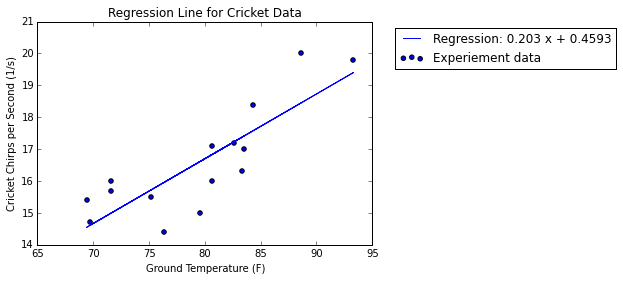

In [28]:
plt.scatter(cricket_array[:,1], cricket_array[:,0], label="Experiement data")
plt.plot(cricket_array[:,1], regr.predict(cricket_array[:,1:]), label="Regression: "+eqn_str)
plt.title("Regression Line for Cricket Data")
plt.xlabel("Ground Temperature (F)")
plt.ylabel("Cricket Chirps per Second (1/s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [20]:
regr.score(cricket_array[:,1:], cricket_array[:,0])

0.69229465291469983

This is not considered a good fit, although it might be considered to constitute a weak correlation.

In [30]:
regr.predict(95)

array([ 19.74428913])

If the ground temperature reached 90 degrees F, then the crickets might chrip at a rate of around 19.7 Hz

In [34]:
# when does it hit 18 chirps per second? I guess we have to make a root finder!
def predict_temp(freq):
    T = 80
    e = 1.
    delta = 0.01
    n = 0
    while e > 0.001:
        n += 1
        dfdT = (regr.predict(T+delta)[0] - regr.predict(T-delta)[0])/(2*delta)
        e = regr.predict(T)[0] - freq
        T += - e / dfdT
        if n > 20:
            print("error")
            break
    return T

In [35]:
predict_temp(18)

86.407431345486287

If the frequency is 18 chirps per second, then the temperature is likely to be about 86.4 degrees F

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [59]:
df = pd.read_fwf("brain_body.txt")

In [60]:
brain_array = np.asarray(df)
regr = linear_model.LinearRegression()
regr.fit(brain_array[:,1:], brain_array[:,0])
eqn_str = str(round(regr.coef_[0],4)) + " x + " + str(round(regr.intercept_,4))
print(eqn_str)

0.9029 x + -56.8555


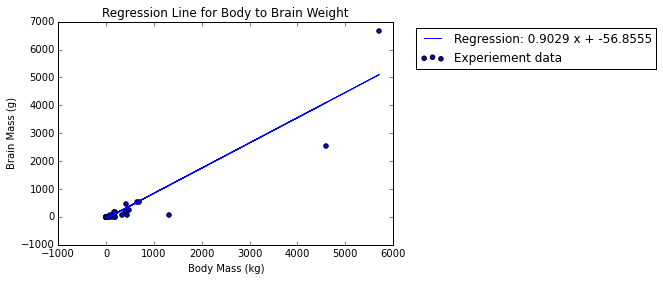

In [62]:
plt.scatter(brain_array[:,1], brain_array[:,0], label="Experiement data")
#plt.xscale("log")
#plt.yscale("log")
plt.plot(brain_array[:,1], regr.predict(brain_array[:,1:]), label="Regression: "+eqn_str)
plt.title("Regression Line for Body to Brain Weight")
plt.xlabel("Body Mass (kg)")
plt.ylabel("Brain Mass (g)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [45]:
regr.score(brain_array[:,1:], brain_array[:,0])

0.87266208430433312

This number indiciates a strong correlation, but I believe there is good reason to doubt its true predicitive power. It would seem that, for some reason, the closeness of points near zero help to get it counted as a tighter correlation. However, in the large animal sizes we see just how problematic this is, where it fails to accurately predict brain mass by perhaps 50% for essentially all examples. I think that some kind of altered log-based least squares method would be better suited for developing a correlation coefficient, which would be rather poor.

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [64]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [65]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [84]:
s_table = np.asarray(df)
salary = s_table[:,5]
print(" Category    Score      Equation")
regr_list = [0 for i in range(5)]
for i in range(5):
    pass
    regr_list[i] = linear_model.LinearRegression()
    regr = regr_list[i]
    regr.fit(s_table[:,i:(i+1)], salary)
    scr = regr.score(s_table[:,i:(i+1)], salary)
    eqn_str = str(round(regr.coef_[0],4)) + " x + " + str(round(regr.intercept_,4))
    print(df.columns[i].rjust(9)+"    "+str(round(scr,5)).ljust(9)+"  "+eqn_str)

 Category    Score      Equation
      Sex    0.0639     -3339.6466 x + 24696.7895
     Rank    0.75254    5952.7789 x + 11663.143
     Year    0.49094    752.7978 x + 18166.1475
   Degree    0.00486    -858.8693 x + 24359.2222
    YSdeg    0.45543    390.6451 x + 17502.2574


In [91]:
print("Predicted salary for Male faculty:   "+str(round(regr_list[0].predict(0)[0], 2)))
print("Predicted salary for Female faculty: "+str(round(regr_list[0].predict(1)[0], 2)))

Predicted salary for Male faculty:   24696.79
Predicted salary for Female faculty: 21357.14


Right off the bat, this looks like a very significant difference between genders. It still doesn't consider the impact of the other factors. For instance, the female faculty may have fewer degrees than the male faculty.

In [104]:
total_regr = linear_model.LinearRegression()
total_regr = regr.fit(s_table[:,0:5], salary)

In [107]:
mean_val = []
for i in range(5):
    mean_val.append(s_table[:,i].mean())
print(mean_val)

[0.26923076923076922, 2.0384615384615383, 7.4807692307692308, 0.65384615384615385, 16.115384615384617]


In [116]:
avg_male = [0]+mean_val[1:]
avg_female = [1]+mean_val[1:]

In [118]:
print("Predicted salary for Male faculty:   "+str(round(total_regr.predict(avg_male)[0], 2)))
print("Predicted salary for Female faculty: "+str(round(total_regr.predict(avg_female)[0], 2)))

Predicted salary for Male faculty:   23463.33
Predicted salary for Female faculty: 24705.12


This result is more statistically meaningful, although the political consequences are very complicated. This shows that a male faculty does not earn more than his female counterpart, if all of their other qualifications are held constant and referenced to the mean candidate. Thus, the data here do not provide direct evidence for gender discrimination. Politically, there still remains a problem that men academics are more qualified on average than female candidates, and this hardly seems irrelevant to the question of gender equality. There may have been discrimination in the granting of degrees in the first place. The factors that encourage men or women to study into certain fields and pursue higher levels of their career are likely to play an even more potent factor.